In [8]:
%pip install boardlib
%pip install pandas
%pip install pandasgui
# Download the kilter dataset by running this in the terminal:
# boardlib database kilter ./kilter.db

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [9]:
import sqlite3
import boardlib
import pandas as pd
from pandasgui import show
con = sqlite3.connect('kilter.db')
cur = con.cursor()
table_list = [a for a in cur.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]
table_names = [entry[0] for entry in table_list]
table_names.sort()
print(table_names)
con.close()

['android_metadata', 'ascents', 'attempts', 'beta_links', 'bids', 'circuits', 'circuits_climbs', 'climb_cache_fields', 'climb_random_positions', 'climb_stats', 'climbs', 'difficulty_grades', 'holes', 'kits', 'layouts', 'leds', 'placement_roles', 'placements', 'product_sizes', 'product_sizes_layouts_sets', 'products', 'products_angles', 'sets', 'shared_syncs', 'tags', 'user_permissions', 'user_syncs', 'users', 'wall_expungements', 'walls', 'walls_sets']


In [10]:
def table_to_df(table_name):
    con = sqlite3.connect('kilter.db')

    df =  pd.read_sql_query(f"SELECT * FROM {table_name}", con)
    
    con.close()

    return df

In [11]:
# get all tables as dfs
for table_name in table_names:
    globals()[table_name] = table_to_df(table_name)

In [12]:
print("The available dataframes are: \n\t" + "\n\t".join(table_names))

The available dataframes are: 
	android_metadata
	ascents
	attempts
	beta_links
	bids
	circuits
	circuits_climbs
	climb_cache_fields
	climb_random_positions
	climb_stats
	climbs
	difficulty_grades
	holes
	kits
	layouts
	leds
	placement_roles
	placements
	product_sizes
	product_sizes_layouts_sets
	products
	products_angles
	sets
	shared_syncs
	tags
	user_permissions
	user_syncs
	users
	wall_expungements
	walls
	walls_sets


In [13]:
# this feels so wrong but wcyd. Could reduce the lines of code but lets just keep it easy to read and understand
def map_vgrade(difficulty):
    if 10 <= difficulty < 12:
        return 0
    elif 12 <= difficulty < 14:
        return 1
    elif 14 <= difficulty < 16:
        return 2
    elif 16 <= difficulty < 18:
        return 3
    elif 18 <= difficulty < 20:
        return 4
    elif 20 <= difficulty < 22:
        return 5
    elif 22 <= difficulty < 23:
        return 6
    elif 23 <= difficulty < 24:
        return 7
    elif 24 <= difficulty < 26:
        return 8
    elif 26 <= difficulty < 28:
        return 9
    elif 28 <= difficulty < 29:
        return 10
    elif 29 <= difficulty < 30:
        return 11
    elif 30 <= difficulty < 31:
        return 12
    elif 31 <= difficulty < 32:
        return 13
    elif 32 <= difficulty < 33:
        return 14
    elif difficulty >= 33:
        return 15
    else:
        return None


C:\Users\Vinicius Dugue\AppData\Local\Temp\ipykernel_31556\1040027887.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_filtered['vgrade'] = merged_df_filtered['display_difficulty'].apply(map_vgrade)
PandasGUI INFO — pandasgui.gui — Opening PandasGUI


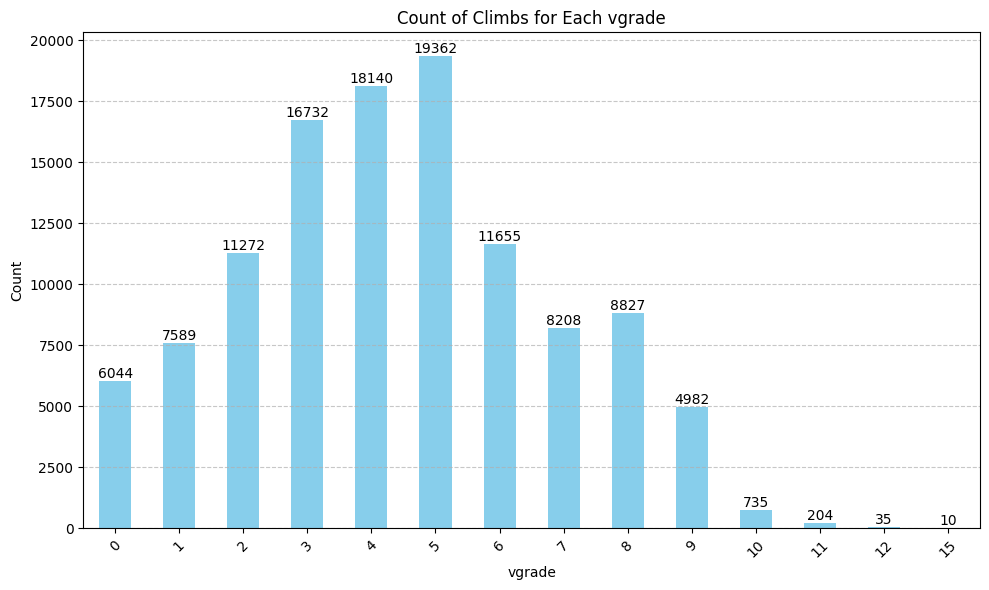

In [14]:
# print(globals()['ascents'].head().to_string(index=False))
climbs = globals()['climbs']
climb_stats=globals()['climb_stats']
# climb_cache_fields = globals()['climb_cache_fields']
merged_df = pd.merge(climbs, climb_stats, left_on='uuid', right_on='climb_uuid', how='inner').drop(columns=['frames'])

# remove rows with more than 1 ascensionist
merged_df_filtered = merged_df[merged_df['ascensionist_count'] >= 2]
merged_df_filtered['vgrade'] = merged_df_filtered['display_difficulty'].apply(map_vgrade)

filtered_columns = ['name','vgrade','angle_y','display_difficulty','created_at', 'ascensionist_count','fa_username', 'benchmark_difficulty',  'is_draft',  'climb_uuid']
filtered_df = merged_df_filtered.loc[:, filtered_columns]

# print(merged_df_filtered.head().to_string(index=False))
show(filtered_df)

import matplotlib.pyplot as plt

# Calculate vgrade counts
vgrade_counts = filtered_df['vgrade'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
bars = vgrade_counts.plot(kind='bar', color='skyblue')
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{int(height)}', ha='center', va='bottom')
plt.title('Count of Climbs for Each vgrade')
plt.xlabel('vgrade')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# r12 - starthold
# r13 - hand hold
# r14 - finish hold
# r15 - foot hold
# p - hold position?

# p1144r15 p1195r13 p1196r12 p1233r12 p1268r13 p1280r13 p1304r13 p1355r13 p1375r13 p1393r14 p1504r15 p1506r15 p1524r15 p1534r15 p1572r15 - EK | Crimp is not a crux

# p1085r15 p1124r12 p1176r12 p1196r13 p1244r13 p1283r13 p1332r13 p1383r14 p1385r14 p1504r15 p1514r15 - Pinch n' Gaston

# p1205r15 p1234r12 p1272r13 p1303r13 p1340r13 p1387r14 p1487r15 p1514r15 -sheep4wood

# p1165r12 p1271r13 p1286r13 p1333r14 p1469r15 p1476r15 - Fission

# p1146r12 p1163r12 p1227r13 p1249r13 p1265r13 p1269r14 p1457r15 p1467r15 p1484r15 p1496r15 p1503r15 p1506r15 p1516r15 - Plastic Age Mindset

# p1127r12 p1164r12 p1233r13 p1235r13 p1283r13 p1287r13 p1299r13 p1348r13 p1379r14 p1458r15 p1507r15 - anti-compressant